In [1]:
# Install required libraries
!pip install yfinance timesfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of googleapis-common-protos to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 28.9 MB/s et

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9afaf58b83aef1f5c4bc5936c9edec7ca1c75531b803ba5bec74e070bbb641a5
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import os
import time
import timesfm
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


2024-09-21 12:27:52.836428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Load TimesFM model
timesfm_backend = "gpu"  # or 'cpu'
from jax._src import config
config.update("jax_platforms", {"cpu": "cpu", "gpu": "cuda", "tpu": ""}[timesfm_backend])

In [11]:
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler

start_date = "2000-10-12"
end_date = "2024-01-01"
analysis_start_date = "2023-01-01"  # تاریخ شروع مورد نظر

# دانلود داده‌های سهام از فایل
df = pd.read_csv('/content/خودرو.csv')

# Ensure the 'date' column is parsed as datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the DataFrame by the date range
data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
data.dropna(inplace=True)
# Set 'date' column as index and ensure it's datetime
data.set_index('date', inplace=True)

# محاسبه میانگین‌های متحرک و اندیکاتورهای تکنیکال
data['moving_avg_10'] = data['close'].rolling(window=10).mean()
data['moving_avg_50'] = data['close'].rolling(window=50).mean()
data['rsi'] = ta.momentum.RSIIndicator(data['close'], window=14).rsi()
data['ema'] = ta.trend.EMAIndicator(data['close'], window=10).ema_indicator()



# حذف سطرهایی که دارای مقادیر NaN هستند (به دلیل محاسبات میانگین‌های متحرک)
data.dropna(inplace=True)
# تنظیم DataFrame نهایی
df_final = data[['close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']].reset_index()
df_final.columns = ['date', 'close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']
df_final['date'] = pd.to_datetime(df_final['date'])
df_final.set_index('date', inplace=True)

# نمایش داده‌ها
df=df_final
df

/tmp/ipykernel_1306/506388662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/tmp/ipykernel_1306/506388662.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moving_avg_10'] = data['close'].rolling(window=10).mean()
/tmp/ipykernel_1306/506388662.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,close,volume,moving_avg_10,moving_avg_50,rsi,ema
date,,,,,,
2001-06-12,3582.0,546106,3547.0,3301.56,62.233437,3542.477587
2001-06-13,3557.0,649121,3540.5,3316.70,59.146837,3545.118026
2001-06-16,3507.0,366728,3534.3,3330.88,53.438312,3538.187476
2001-06-17,3496.0,547261,3533.9,3344.90,52.243682,3530.517025
2001-06-18,3510.0,491032,3531.9,3358.12,53.663473,3526.786657
...,...,...,...,...,...,...
2023-12-26,2718.0,168546657,2777.6,2630.86,48.497521,2767.600447
2023-12-27,2732.0,166270066,2772.4,2632.50,50.106167,2761.127638
2023-12-30,2736.0,232527644,2770.3,2635.10,50.581110,2756.558977


In [12]:
def get_batched_data_fn(context_len: int = 32, horizon_len: int = 1):
    examples = defaultdict(list)
    num_examples = 0
    for start in range(0, len(df) - (context_len + horizon_len), horizon_len):
        num_examples += 1
        context_end = start + context_len
        examples["inputs"].append(df["close"][start:context_end].tolist())
        examples["volume"].append(df["volume"][start:context_end].tolist() + [df["volume"].iloc[context_end - 1]])
        examples["outputs"].append(df["close"][context_end:context_end + horizon_len].tolist())
        examples["dates"].append(df.index[start:context_end + horizon_len].tolist())  # Add dates to examples

    def data_fn():
        for i in range(num_examples):
            yield {k: v[i] for k, v in examples.items()}

    return data_fn

In [13]:
import timesfm

context_len = 512
batch_size = 1  # ثابت نگه‌داشتن batch size
horizon_len = 1  # ثابت نگه‌داشتن horizon length



In [8]:

    model = timesfm.TimesFm(
        context_len=context_len,
        horizon_len=horizon_len,
        input_patch_len=32,
        output_patch_len=128,
        num_layers=20,
        model_dims=1280,
        backend="gpu",
    )
    model.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

2024-09-21 12:28:41.756907: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.68). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 4.05 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 1.40 seconds.
Jitting decoding.
Jitted decoding in 24.04 seconds.


In [38]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict

# Define context lengths to test
context_lengths = range(64, 513, 32)

# Define the start date and number of days to predict
analysis_start_date = pd.to_datetime("2023-05-06")

# Store results for different context lengths
results_by_context_len = []

for context_len in context_lengths:
    print(f"Processing context_len: {context_len}")

    # تنظیم داده‌ها
    start_idx = df.index.get_loc(analysis_start_date) - context_len

    # حلقه پیش‌بینی تا پایان داده‌ها
    while start_idx + context_len < len(df):
        # تعیین بازه زمانی بر اساس context_len
        end_idx = start_idx + context_len

        inputs = df['close'].iloc[start_idx:end_idx].tolist()

        # Prepare dynamic numerical covariates, e.g., volume
        dynamic_numerical_covariates = {
            "volume": df['volume'].iloc[start_idx:end_idx].tolist() + [df['volume'].iloc[end_idx-1]],
        }
        dynamic_numerical_covariates_formatted = {k: [v] for k, v in dynamic_numerical_covariates.items()}

        # Make the forecast using the model
        raw_forecast, _ = model.forecast(
            inputs=[inputs], freq=[0] * len(inputs)
        )

        # Make the forecast with covariates using the model
        cov_forecast, ols_forecast = model.forecast_with_covariates(
            inputs=[inputs],
            dynamic_numerical_covariates=dynamic_numerical_covariates_formatted,
            dynamic_categorical_covariates={},
            static_numerical_covariates={},
            static_categorical_covariates={},
            freq=[0] * len(inputs),
            normalize_xreg_target_per_input=True,
            xreg_mode="xreg + timesfm",
        )

        # Store the prediction date and actual values
        predict_date = df.index[end_idx]
        y_actual = df['close'].iloc[end_idx]

        # Append results to the list
        results_by_context_len.append({
            'context_len': context_len,
            'predict_date': predict_date,
            'raw_forecast': raw_forecast[0][0],
            'cov_forecast': cov_forecast[0][0],
            'train_start_date': df.index[start_idx],
            'train_end_date': df.index[end_idx-1],
            'y_actual': y_actual,
            'volume': dynamic_numerical_covariates["volume"],
        })

        # Increment start index for the next prediction
        start_idx += 1

# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results_by_context_len)





Processing context_len: 64
Processing context_len: 96
Processing context_len: 128
Processing context_len: 160
Processing context_len: 192
Processing context_len: 224
Processing context_len: 256
Processing context_len: 288
Processing context_len: 320
Processing context_len: 352
Processing context_len: 384
Processing context_len: 416
Processing context_len: 448
Processing context_len: 480
Processing context_len: 512


In [39]:
 results_df = pd.DataFrame(results_by_context_len)
 results_df=results_df[:-1]

In [40]:
results_df

,context_len,predict_date,raw_forecast,cov_forecast,train_start_date,train_end_date,y_actual,volume
0,64,2023-05-06,4236.040039,4272.323242,2023-01-01,2023-05-03,4417.0,"[1345500753, 579189542, 2127828444, 1022535786..."
1,64,2023-05-07,4427.860352,4258.421387,2023-01-02,2023-05-06,4197.0,"[579189542, 2127828444, 1022535786, 1250800861..."
2,64,2023-05-08,4261.471191,4244.785645,2023-01-03,2023-05-07,4129.0,"[2127828444, 1022535786, 1250800861, 126324203..."
3,64,2023-05-09,4190.154297,4121.741211,2023-01-04,2023-05-08,4041.0,"[1022535786, 1250800861, 1263242036, 797449195..."
4,64,2023-05-10,4105.550781,4238.439941,2023-01-07,2023-05-09,3782.0,"[1250800861, 1263242036, 797449195, 738060798,..."
...,...,...,...,...,...,...,...,...
2334,512,2023-12-25,2741.892334,2752.053711,2021-09-04,2023-12-24,2755.0,"[399876306, 529526026, 443119585, 517964021, 3..."
2335,512,2023-12-26,2721.427002,2741.498047,2021-09-05,2023-12-25,2718.0,"[529526026, 443119585, 517964021, 331638818, 2..."
2336,512,2023-12-27,2694.581055,2721.875977,2021-09-06,2023-12-26,2732.0,"[443119585, 517964021, 331638818, 272742264, 3..."
2337,512,2023-12-30,2720.743896,2721.398438,2021-09-07,2023-12-27,2736.0,"[517964021, 331638818, 272742264, 389901970, 5..."


In [41]:
 initial_investment = 10000000

In [42]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

def calculate_mse(y_actual, y_forecast):
    return mean_squared_error(y_actual, y_forecast)

# Generalized accuracy function
def calculate_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1
    b=predicted_movement
    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized profit calculation function
def calculate_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(1, len(y_actual)):
        today_price = y_actual.iloc[i]
        yesterday_price = y_actual.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment

# Generalized actual direction accuracy function
def calculate_actual_direction_accuracy(y_actual, y_forecast):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(y_actual)):
        real_directions.append(get_direction(y_actual.iloc[i - 1], y_actual.iloc[i]))
        predicted_directions.append(get_direction(y_actual.iloc[i - 1], y_forecast.iloc[i]))


    return accuracy_score(real_directions, predicted_directions)

# Generalized direction accuracy function
def calculate_direction_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        predicted_yesterday = y_forecast.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - predicted_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized direction profit calculation function
def calculate_direction_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(2, len(y_forecast)):
        yesterday_price = y_actual.iloc[i - 1]
        yesterday_predicted_today_price = y_forecast.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment




def calculate_final_results(results_df):
    final_results = []

    for context_len in results_df['context_len'].unique():
        context_results_df = results_df[results_df['context_len'] == context_len]

        y_actual = context_results_df['y_actual']
        y_cov_forecast = context_results_df['cov_forecast']
        y_raw_forecast = context_results_df['raw_forecast']

        mse_value_cov = calculate_mse(y_actual, y_cov_forecast)
        accuracy_value_cov = calculate_accuracy(y_actual, y_cov_forecast)
        profit_cov = calculate_profit(y_actual, y_cov_forecast)
        direction_accuracy_cov = calculate_direction_accuracy(y_actual, y_cov_forecast)
        actual_direction_accuracy_cov = calculate_actual_direction_accuracy(y_actual, y_cov_forecast)
        direction_profit_cov = calculate_direction_profit(y_actual, y_cov_forecast)

        mse_value_raw = calculate_mse(y_actual, y_raw_forecast)
        accuracy_value_raw = calculate_accuracy(y_actual, y_raw_forecast)
        profit_raw = calculate_profit(y_actual, y_raw_forecast)
        direction_accuracy_raw = calculate_direction_accuracy(y_actual, y_raw_forecast)
        actual_direction_accuracy_raw = calculate_actual_direction_accuracy(y_actual, y_raw_forecast)
        direction_profit_raw = calculate_direction_profit(y_actual, y_raw_forecast)

        final_results.append({
            'context_len': context_len,
            'mse_cov': mse_value_cov,
            'accuracy_cov': accuracy_value_cov,
            'direction_accuracy_cov': direction_accuracy_cov,
            'actual_direction_accuracy_cov': actual_direction_accuracy_cov,
            'direction_profit_cov': direction_profit_cov,
            'profit_cov': profit_cov,
            'mse_raw': mse_value_raw,
            'accuracy_raw': accuracy_value_raw,
            'direction_accuracy_raw': direction_accuracy_raw,
            'actual_direction_accuracy_raw': actual_direction_accuracy_raw,
            'direction_profit_raw': direction_profit_raw,
            'profit_raw': profit_raw,
        })

    return pd.DataFrame(final_results)

# محاسبه نتایج نهایی
final_results = calculate_final_results(results_df)
print(final_results)


    context_len       mse_cov  accuracy_cov  direction_accuracy_cov  \
0            64   7051.846221      0.561290                0.529032   
1            96   9232.119406      0.464516                0.477419   
2           128  16268.818566      0.503226                0.496774   
3           160  17507.759227      0.503226                0.503226   
4           192  17680.186214      0.535484                0.470968   
5           224  20072.688585      0.541935                0.451613   
6           256  17616.142833      0.516129                0.470968   
7           288  16370.437781      0.516129                0.496774   
8           320  15735.508659      0.561290                0.522581   
9           352  15491.743231      0.509677                0.522581   
10          384  13651.685362      0.548387                0.509677   
11          416  12403.685705      0.496774                0.483871   
12          448  12838.417376      0.561290                0.503226   
13    

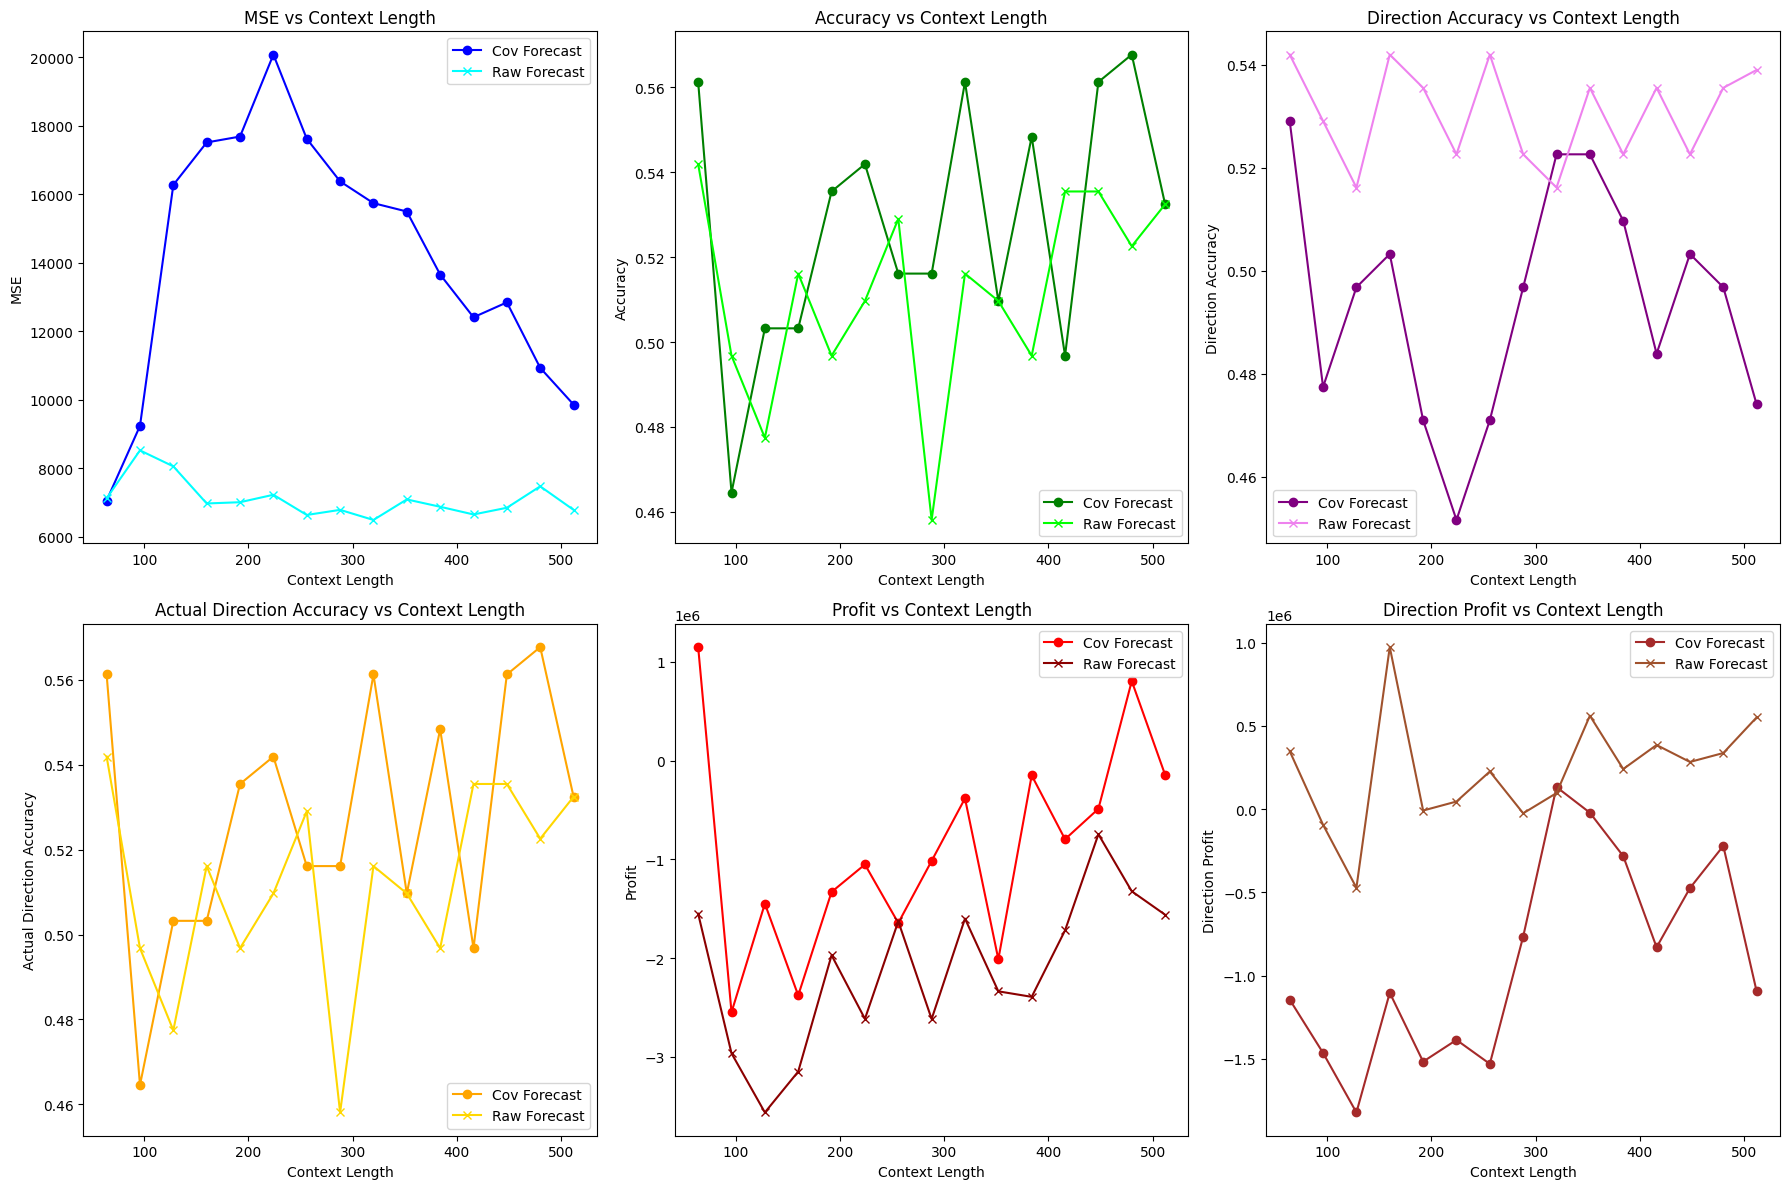

In [43]:
import matplotlib.pyplot as plt

# رسم نمودار تغییرات MSE، Accuracy، Direction Accuracy، Actual Direction Accuracy، Profit و Direction Profit بر حسب context_len
plt.figure(figsize=(18, 12))

# نمودار MSE
plt.subplot(2, 3, 1)
plt.plot(final_results['context_len'], final_results['mse_cov'], marker='o', color='blue', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['mse_raw'], marker='x', color='cyan', label='Raw Forecast')
plt.title('MSE vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('MSE')
plt.legend()

# نمودار Accuracy
plt.subplot(2, 3, 2)
plt.plot(final_results['context_len'], final_results['accuracy_cov'], marker='o', color='green', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['accuracy_raw'], marker='x', color='lime', label='Raw Forecast')
plt.title('Accuracy vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('Accuracy')
plt.legend()

# نمودار Direction Accuracy
plt.subplot(2, 3, 3)
plt.plot(final_results['context_len'], final_results['direction_accuracy_cov'], marker='o', color='purple', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['direction_accuracy_raw'], marker='x', color='violet', label='Raw Forecast')
plt.title('Direction Accuracy vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('Direction Accuracy')
plt.legend()

# نمودار Actual Direction Accuracy
plt.subplot(2, 3, 4)
plt.plot(final_results['context_len'], final_results['actual_direction_accuracy_cov'], marker='o', color='orange', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['actual_direction_accuracy_raw'], marker='x', color='gold', label='Raw Forecast')
plt.title('Actual Direction Accuracy vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('Actual Direction Accuracy')
plt.legend()

# نمودار Profit
plt.subplot(2, 3, 5)
plt.plot(final_results['context_len'], final_results['profit_cov'], marker='o', color='red', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['profit_raw'], marker='x', color='darkred', label='Raw Forecast')
plt.title('Profit vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('Profit')
plt.legend()

# نمودار Direction Profit
plt.subplot(2, 3, 6)
plt.plot(final_results['context_len'], final_results['direction_profit_cov'], marker='o', color='brown', label='Cov Forecast')
plt.plot(final_results['context_len'], final_results['direction_profit_raw'], marker='x', color='sienna', label='Raw Forecast')
plt.title('Direction Profit vs Context Length')
plt.xlabel('Context Length')
plt.ylabel('Direction Profit')
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
# پیدا کردن context_len که بیشترین یا کمترین مقدار هر معیار را دارد برای Cov Forecast

# Minimum MSE برای Cov Forecast
min_mse_cov = final_results.loc[final_results['mse_cov'].idxmin()]
print(f"Minimum MSE (Cov Forecast): {min_mse_cov['mse_cov']} at Context Length: {min_mse_cov['context_len']}")

# Maximum Accuracy برای Cov Forecast
max_accuracy_cov = final_results.loc[final_results['accuracy_cov'].idxmax()]
print(f"Maximum Accuracy (Cov Forecast): {max_accuracy_cov['accuracy_cov']} at Context Length: {max_accuracy_cov['context_len']}")

# Maximum Direction Accuracy برای Cov Forecast
max_direction_accuracy_cov = final_results.loc[final_results['direction_accuracy_cov'].idxmax()]
print(f"Maximum Direction Accuracy (Cov Forecast): {max_direction_accuracy_cov['direction_accuracy_cov']} at Context Length: {max_direction_accuracy_cov['context_len']}")

# Maximum Actual Direction Accuracy برای Cov Forecast
max_actual_direction_accuracy_cov = final_results.loc[final_results['actual_direction_accuracy_cov'].idxmax()]
print(f"Maximum Actual Direction Accuracy (Cov Forecast): {max_actual_direction_accuracy_cov['actual_direction_accuracy_cov']} at Context Length: {max_actual_direction_accuracy_cov['context_len']}")

# Maximum Profit برای Cov Forecast
max_profit_cov = final_results.loc[final_results['profit_cov'].idxmax()]
print(f"Maximum Profit (Cov Forecast): {max_profit_cov['profit_cov']} at Context Length: {max_profit_cov['context_len']}")

# Maximum Direction Profit برای Cov Forecast
max_direction_profit_cov = final_results.loc[final_results['direction_profit_cov'].idxmax()]
print(f"Maximum Direction Profit (Cov Forecast): {max_direction_profit_cov['direction_profit_cov']} at Context Length: {max_direction_profit_cov['context_len']}")



Minimum MSE (Cov Forecast): 7051.846221031286 at Context Length: 64.0
Maximum Accuracy (Cov Forecast): 0.567741935483871 at Context Length: 480.0
Maximum Direction Accuracy (Cov Forecast): 0.5290322580645161 at Context Length: 64.0
Maximum Actual Direction Accuracy (Cov Forecast): 0.567741935483871 at Context Length: 480.0
Maximum Profit (Cov Forecast): 1150343.5200633649 at Context Length: 64.0
Maximum Direction Profit (Cov Forecast): 132202.69364231266 at Context Length: 320.0


In [45]:

# پیدا کردن context_len که بیشترین یا کمترین مقدار هر معیار را دارد برای Raw Forecast

# Minimum MSE برای Raw Forecast
min_mse_raw = final_results.loc[final_results['mse_raw'].idxmin()]
print(f"Minimum MSE (Raw Forecast): {min_mse_raw['mse_raw']} at Context Length: {min_mse_raw['context_len']}")

# Maximum Accuracy برای Raw Forecast
max_accuracy_raw = final_results.loc[final_results['accuracy_raw'].idxmax()]
print(f"Maximum Accuracy (Raw Forecast): {max_accuracy_raw['accuracy_raw']} at Context Length: {max_accuracy_raw['context_len']}")

# Maximum Direction Accuracy برای Raw Forecast
max_direction_accuracy_raw = final_results.loc[final_results['direction_accuracy_raw'].idxmax()]
print(f"Maximum Direction Accuracy (Raw Forecast): {max_direction_accuracy_raw['direction_accuracy_raw']} at Context Length: {max_direction_accuracy_raw['context_len']}")

# Maximum Actual Direction Accuracy برای Raw Forecast
max_actual_direction_accuracy_raw = final_results.loc[final_results['actual_direction_accuracy_raw'].idxmax()]
print(f"Maximum Actual Direction Accuracy (Raw Forecast): {max_actual_direction_accuracy_raw['actual_direction_accuracy_raw']} at Context Length: {max_actual_direction_accuracy_raw['context_len']}")

# Maximum Profit برای Raw Forecast
max_profit_raw = final_results.loc[final_results['profit_raw'].idxmax()]
print(f"Maximum Profit (Raw Forecast): {max_profit_raw['profit_raw']} at Context Length: {max_profit_raw['context_len']}")

# Maximum Direction Profit برای Raw Forecast
max_direction_profit_raw = final_results.loc[final_results['direction_profit_raw'].idxmax()]
print(f"Maximum Direction Profit (Raw Forecast): {max_direction_profit_raw['direction_profit_raw']} at Context Length: {max_direction_profit_raw['context_len']}")

Minimum MSE (Raw Forecast): 6486.377397492528 at Context Length: 320.0
Maximum Accuracy (Raw Forecast): 0.5419354838709678 at Context Length: 64.0
Maximum Direction Accuracy (Raw Forecast): 0.5419354838709678 at Context Length: 64.0
Maximum Actual Direction Accuracy (Raw Forecast): 0.5419354838709678 at Context Length: 64.0
Maximum Profit (Raw Forecast): -746043.3164077606 at Context Length: 448.0
Maximum Direction Profit (Raw Forecast): 972999.250128068 at Context Length: 160.0


In [46]:

initial_price = results_df['y_actual'].iloc[0]
final_price = results_df['y_actual'].iloc[-1]


# Calculate the number of shares bought initially
shares_bought = initial_investment / initial_price

# Calculate the final value of the investment
final_investment_value = shares_bought * final_price

# Calculate the total profit
buy_and_hold_profit = final_investment_value - initial_investment
buy_and_hold_profit

-3753678.9676250853